## Training the augmented convconvpool model with more batches and data augmentation by zooming.


In this notebook, I increased the training set sample from 6394 samples to 10000 samples, and ran the model for 80 epochs.


In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
from convconvpool import Convtrain as conv
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.5,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=80, steps_per_epoch=500)

ModuleNotFoundError: No module named 'convolutionalmodel3'

In [ ]:
a = history.history

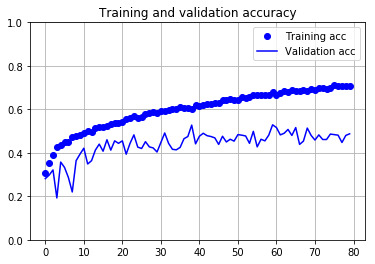

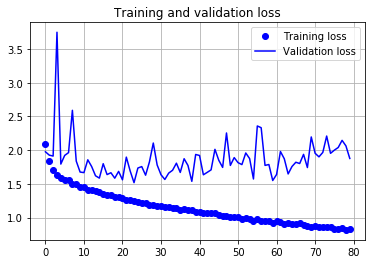

In [12]:
acc = a['accuracy']
val_acc = a['val_accuracy']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid()
ax = plt.gca()
ax.set_ylim(0,1)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
ax = plt.gca()
plt.legend()

plt.show()


This looks better. The model isn't overfitting as much anymore. However the accuracy of the validation set is only about 0.47 and doesn't seem to be improving with an increasing amount of epochs. 

In [9]:
with open('convconvzoom.pickle', 'wb') as handle:
    pickle.dump(a, handle)

In [10]:
Model.save('convconvzoom')